<a href="https://colab.research.google.com/github/yasmine-oukemoum/SkyFare-Predictor/blob/main/SkyFarePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
train=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")
test=pd.read_excel("/content/drive/MyDrive/Test_set.xlsx")


In [ ]:
# Data Manipulation and Numerical Computing
import pandas as pd
import numpy as np

# Date and Time Handling
from datetime import datetime

# Scientific Computing
from scipy import stats, optimize, integrate

# Machine Learning - Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Machine Learning - XGBoost
from xgboost import XGBClassifier, XGBRegressor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings Management
import warnings
warnings.filterwarnings('ignore')


In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")
test=pd.read_excel("/content/drive/MyDrive/Test_set.xlsx")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
len_train=train.shape[0]
print(len_train)

10683


In [ ]:
for i in train.columns:
  print("unique values in",i,train[i].nunique())

unique values in Airline 12
unique values in Date_of_Journey 44
unique values in Source 5
unique values in Destination 6
unique values in Route 128
unique values in Dep_Time 222
unique values in Arrival_Time 1343
unique values in Duration 368
unique values in Total_Stops 5
unique values in Additional_Info 10
unique values in Price 1870


In [ ]:
for i in test.columns:
  print("unique values in",i,test[i].nunique())

unique values in Airline 11
unique values in Date_of_Journey 44
unique values in Source 5
unique values in Destination 6
unique values in Route 100
unique values in Dep_Time 199
unique values in Arrival_Time 704
unique values in Duration 320
unique values in Total_Stops 5
unique values in Additional_Info 6


In [ ]:
train=pd.read_excel("/content/drive/MyDrive/Data_Train.xlsx")
test=pd.read_excel("/content/drive/MyDrive/Test_set.xlsx")

train = pd.concat([train, test], ignore_index=True)
train=train.reset_index()
train=train.drop('index',axis=1)

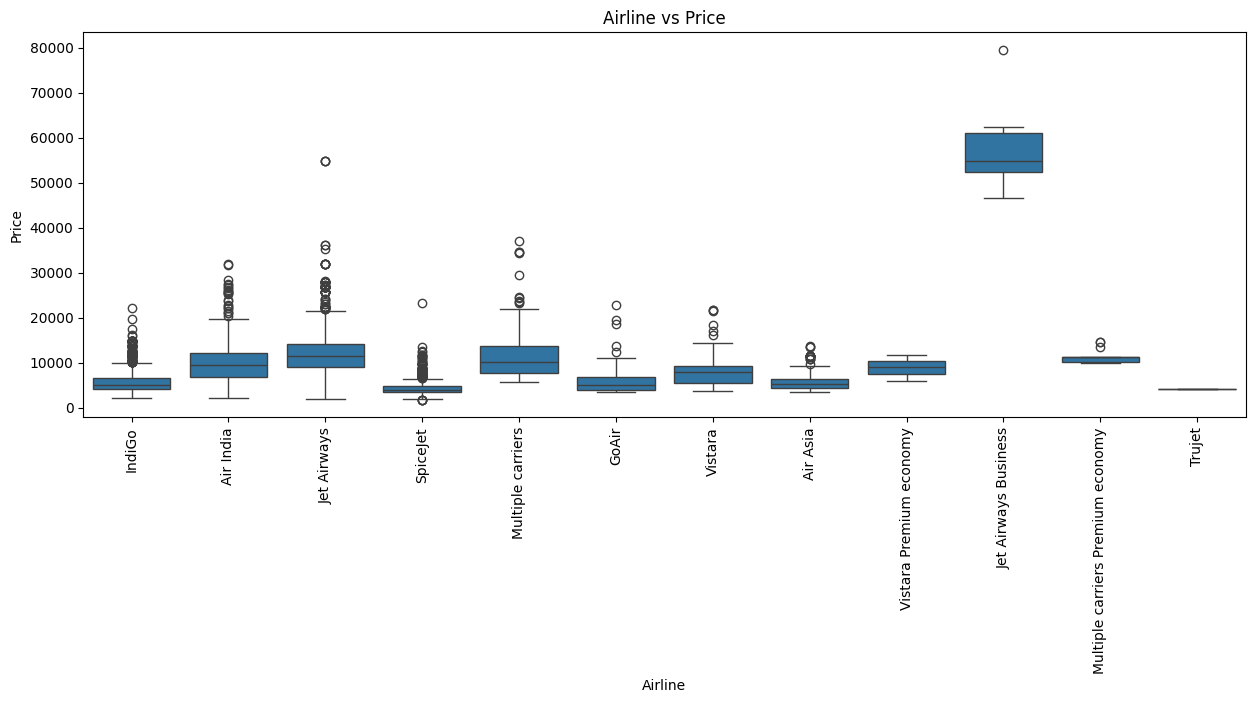

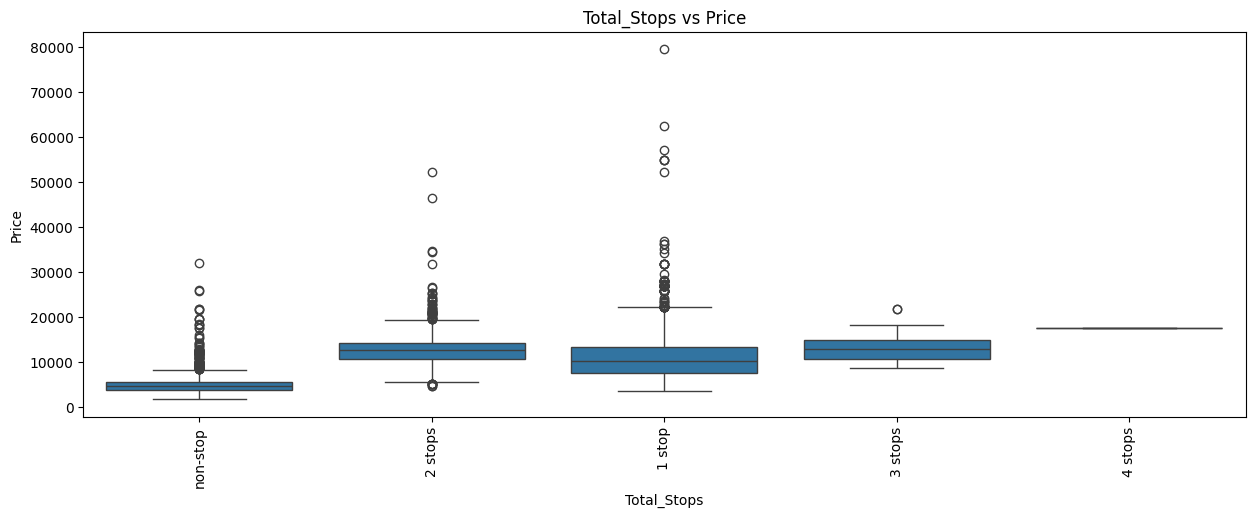

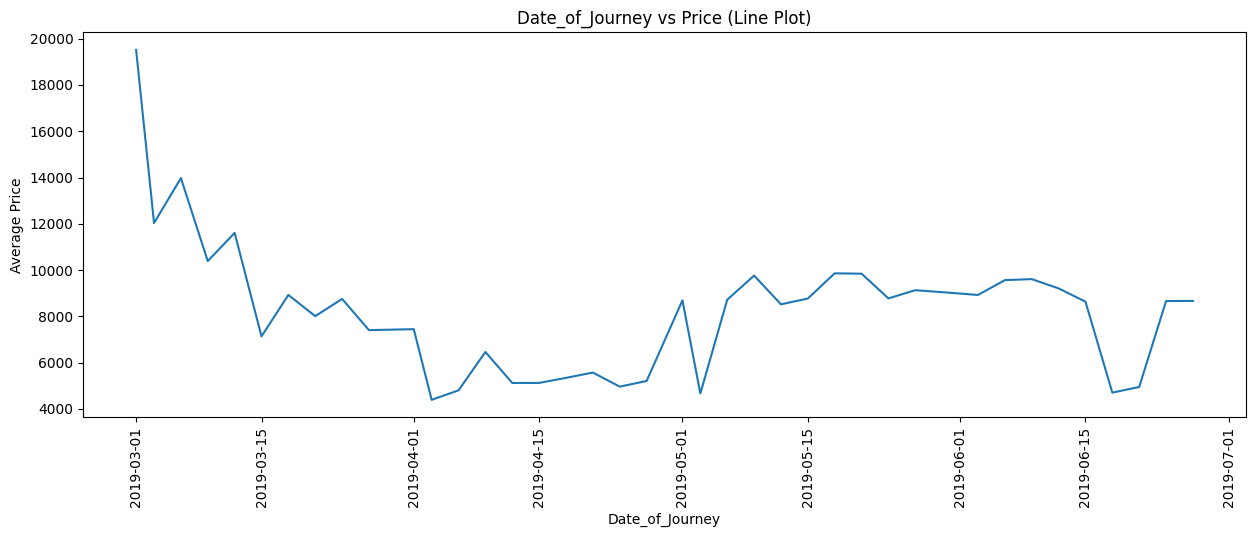

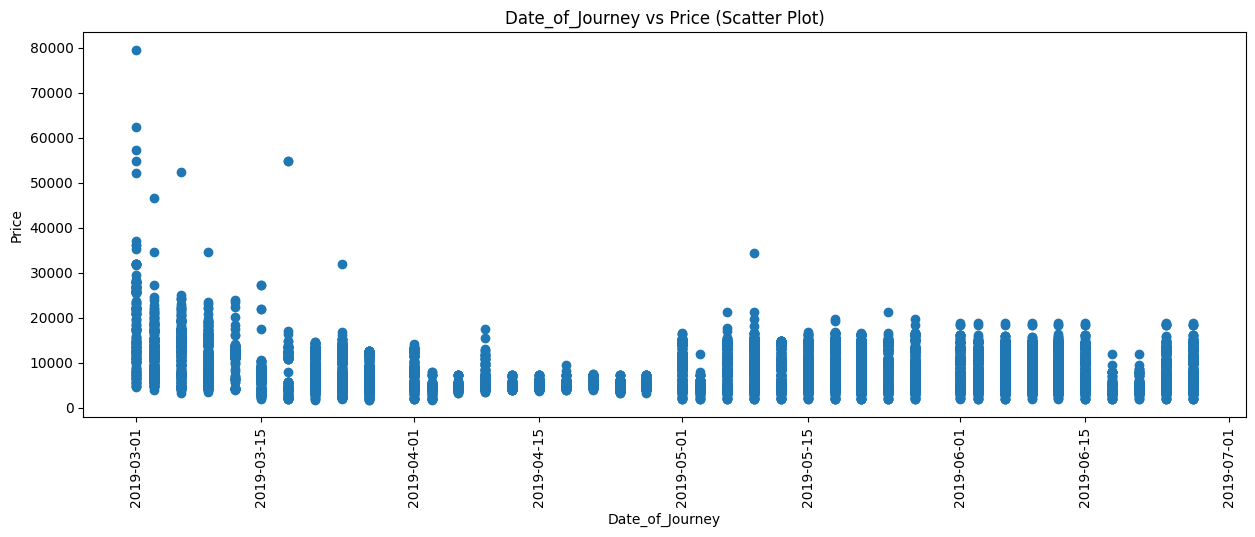

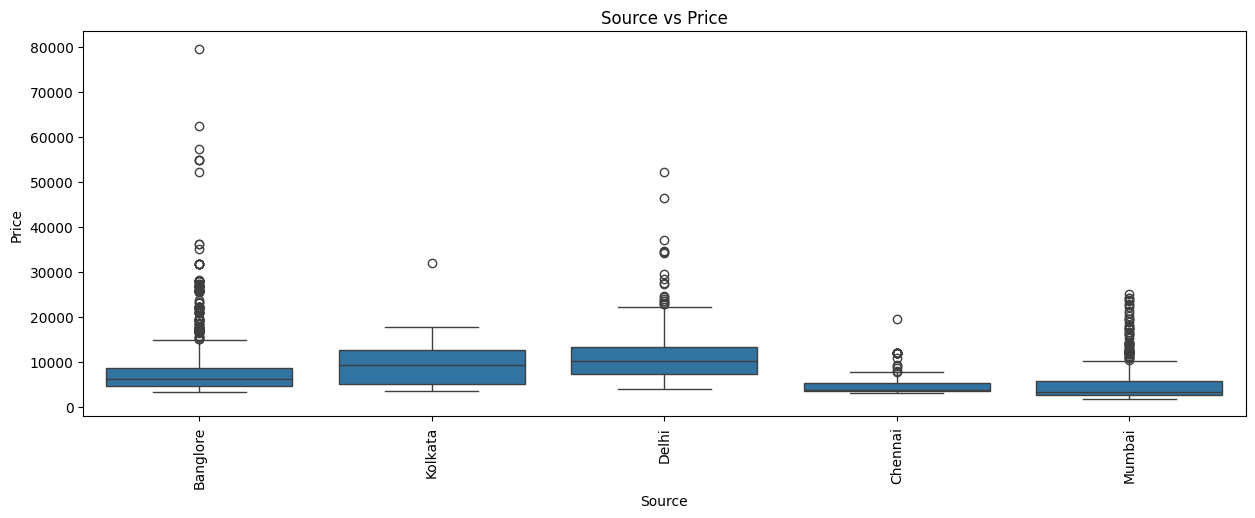

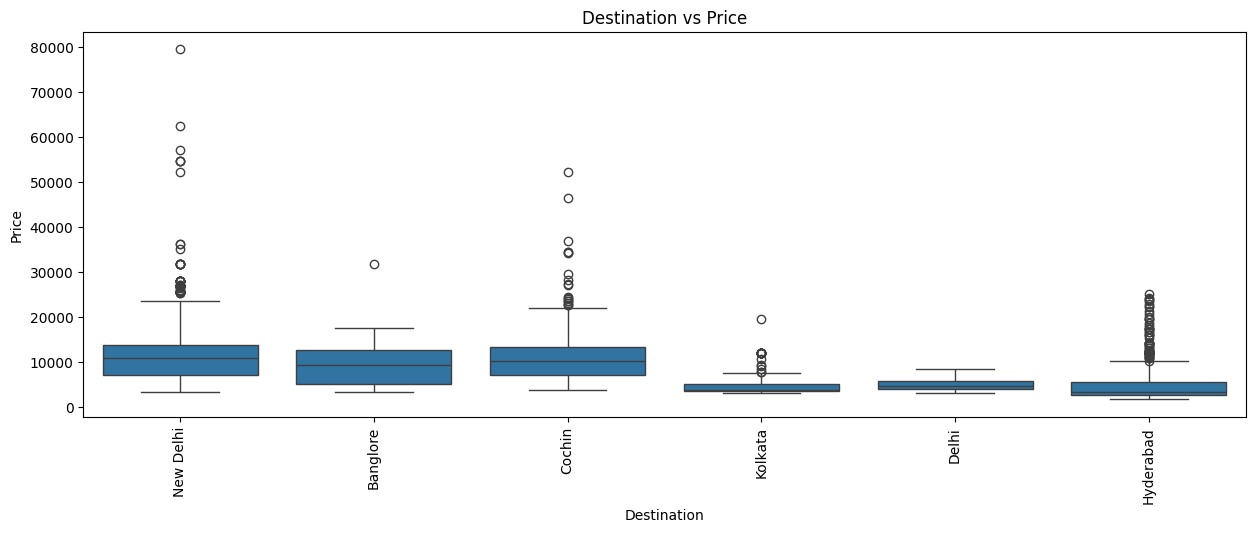

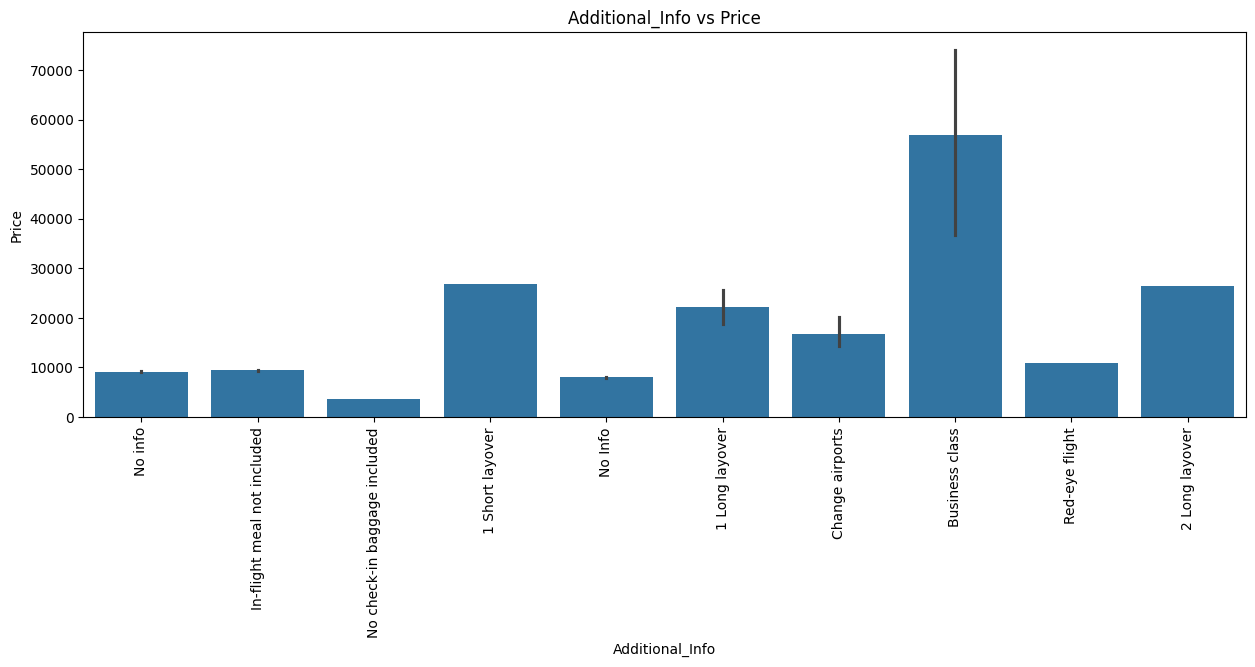

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'train' is your dataframe
# Ensure 'Price' is numeric (already done above)
train['Price'] = pd.to_numeric(train['Price'], errors='coerce')

# Convert 'Date_of_Journey' to datetime if it's not already
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], errors='coerce')

# Plot 1: Airline vs Price (Boxplot)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(x='Airline', y='Price', data=train)
plt.title('Airline vs Price')
plt.show()

# Plot 2: Total_Stops vs Price (Boxplot)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(x='Total_Stops', y='Price', data=train)
plt.title('Total_Stops vs Price')
plt.show()

# Plot 3: Date_of_Journey vs Price (Line plot with date grouping)
# First, group by 'Date_of_Journey' and take the mean price for each date
date_grouped = train.groupby('Date_of_Journey')['Price'].mean().reset_index()

plt.figure(figsize=[15,5])
plt.plot(date_grouped['Date_of_Journey'], date_grouped['Price'])
plt.xticks(rotation=90)
plt.title('Date_of_Journey vs Price (Line Plot)')
plt.xlabel('Date_of_Journey')
plt.ylabel('Average Price')
plt.show()

# Plot 4: Date_of_Journey vs Price (Scatter plot)
plt.figure(figsize=[15,5])
plt.scatter(train['Date_of_Journey'], train['Price'])
plt.xticks(rotation=90)
plt.title('Date_of_Journey vs Price (Scatter Plot)')
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.show()

# Plot 5: Source vs Price (Boxplot)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(x='Source', y='Price', data=train)
plt.title('Source vs Price')
plt.show()

# Plot 6: Destination vs Price (Boxplot)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(x='Destination', y='Price', data=train)
plt.title('Destination vs Price')
plt.show()

# Plot 7: Additional_Info vs Price (Barplot)
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.barplot(x='Additional_Info', y='Price', data=train)
plt.title('Additional_Info vs Price')
plt.show()


In [ ]:
train.iloc[1]

,1
Airline,Air India
Date_of_Journey,2019-05-01 00:00:00
Source,Kolkata
Destination,Banglore
Route,CCU → IXR → BBI → BLR
Dep_Time,05:50
Arrival_Time,13:15
Duration,7h 25m
Total_Stops,2 stops
Additional_Info,No info


In [ ]:
train['Depart_Time_Hour']=pd.to_datetime(train['Dep_Time']).dt.hour
train['Depart_Time_Min']=pd.to_datetime(train['Dep_Time']).dt.minute

train['Arr_Time_Hour']=pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arr_Time_Min']=pd.to_datetime(train['Arrival_Time']).dt.minute

In [ ]:
train.iloc[1]

,1
Airline,Air India
Date_of_Journey,2019-05-01 00:00:00
Source,Kolkata
Destination,Banglore
Route,CCU → IXR → BBI → BLR
Dep_Time,05:50
Arrival_Time,13:15
Duration,7h 25m
Total_Stops,2 stops
Additional_Info,No info


In [ ]:
train.Dep_time=pd.to_datetime(train.Dep_Time,format="%H:%M").dt.time


:

In [ ]:
train.Arrival_Time=train.Arrival_Time.str.slice(0,6)
train.Arrival_Time=train.Arrival_Time.str.strip()
train.Arrival_Time=pd.to_datetime(train.Arrival_Time,format="%H:%M").dt.time

In [ ]:
train.Date_of_Journey=pd.to_datetime(train.Date_of_Journey,format="%d/%m/%Y").dt.date

In [ ]:
minute=train['Duration'].str.slice(3,).str.extract('(\d+)')
hour=train['Duration'].str.extract('(\d+)').astype(int)
minute=minute.fillna(0)
train['Duration']=minute.astype('int')+hour.astype('int')*60

In [ ]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y')
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'], format='%H:%M').dt.time

train['Data_of_Arrival'] = train.apply(
    lambda r: pd.to_datetime(str(r['Date_of_Journey'].date()) + ' ' + str(r['Dep_Time'])), axis=1
) + pd.to_timedelta(pd.to_numeric(train['Duration'], errors='coerce'), unit='m')

train['Data_of_Arrival'] = train['Data_of_Arrival'].dt.date


In [ ]:
train.Total_Stops.value_counts()

,count
Total_Stops,
1 stop,7056
non-stop,4340
2 stops,1899
3 stops,56
4 stops,2


In [ ]:
dic={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
train['Total_Stops']=train.Total_Stops.map(dic)
train.Total_Stops=train.Total_Stops.astype('category')

In [ ]:
r=train.Airline.str.split('',expand=True).get(2)
d={None:'Economy','Premium':'Premium Economy','economy':'Premium Economy','Business':'Business'}
r=r.map(d)
train['Class']=r
train.Class=train.Class.astype('category')

In [ ]:
train.loc[train.Additional_Info=="No Info","Additional_Info"]="No Info"

In [ ]:
train['Data_of_Arrival'] = pd.to_datetime(train['Data_of_Arrival'])

In [ ]:
train.iloc[0]

,0
Airline,IndiGo
Date_of_Journey,2019-03-24 00:00:00
Source,Banglore
Destination,New Delhi
Route,BLR → DEL
Dep_Time,22:20:00
Arrival_Time,01:10:00
Duration,170
Total_Stops,0.0
Additional_Info,No info


In [ ]:
train['Same_day_travel'] = train.Data_of_Arrival-train.Date_of_Journey
train['Same_day_travel'] = train.Same_day_travel.astype('category')


In [ ]:
train.Airline=train.Airline.astype('category')


In [ ]:
train["weekday_journey"]=train["Date_of_Journey"].apply(lambda x:x.weekday())
train["weekday_arrival"]=train["Data_of_Arrival"].apply(lambda x:x.weekday())

In [ ]:
train['Year']=pd.DatetimeIndex(train['Date_of_Journey']).year
train['Month_Of_Journey']=pd.DatetimeIndex(train['Date_of_Journey']).month
train['Day_Of_Journey']=pd.DatetimeIndex(train['Date_of_Journey']).day
train['Month_Of_Arrival']=pd.DatetimeIndex(train['Data_of_Arrival']).month
train['Day_Of_Arrival']=pd.DatetimeIndex(train['Data_of_Arrival']).day

In [ ]:
Class={
    'IndiGo': 'Economy',
    'Air India': 'Economy',
    'Multiple carriers': 'Economy',
    'SpiceJet': 'Economy',
    'Vistara': 'Economy',
    'GoAir': 'Economy',
    'Jet Airways': 'Economy',
    'Multiple carriers Premium economy': 'Premium Economy',
    'Jet Airways Business': 'Business',
    'Vistara Premium economy': 'Premium Economy',
    'Trujet': 'Economy',
    'Air Asia': 'Economy'
}
train['Booking_Class']=train['Airline'].map(Class)
test['Booking_Class']=test['Airline'].map(Class)

In [ ]:
market={
    'IndiGo': 41.3,
    'Air India': 13.5,
    'Multiple carriers': 1,
    'SpiceJet': 13.3,
    'Vistara': 3.3,
    'GoAir': 8.4,
    'Jet Airways': 17.8,
    'Multiple carriers Premium economy': 1,
    'Jet Airways Business': 17.7,
    'Vistara Premium economy': 3.3,
    'Trujet': 0.1,
    'Air Asia': 3.3
}
train['Market_Share']=train['Airline'].map(market)
test['Market_Share']=test['Airline'].map(market)

In [ ]:
r=train.groupby(['Date_of_Journey']).Date_of_Journey.apply(lambda x:x.count())
train['Number_take-offs']=train.Date_of_Journey.map(r)
r=train.groupby(['Data_of_Arrival']).Data_of_Arrival.apply(lambda x:x.count())
train['Number_landings']=train.Data_of_Arrival.map(r)


In [ ]:
r=train.groupby(['Date_of_Journey','Source'])['Source'].count().reset_index(name='Number_takeoff_source')
train=train.merge(r,on=['Date_of_Journey','Source'],how='left')
r=train.groupby(['Data_of_Arrival','Source'])['Source'].count().reset_index(name='Number_landings_Destination')
train=train.merge(r,on=['Data_of_Arrival','Source'],how='left')


In [ ]:
import datetime

train[train['Data_of_Arrival'].dt.date == datetime.date(2019, 3, 1)][['Source', 'Number_landings_Destination']]


,Source,Number_landings_Destination
4,Banglore,103
56,Banglore,103
268,Chennai,11
396,Delhi,5
486,Banglore,103
...,...,...
13105,Banglore,103
13121,Banglore,103
13139,Kolkata,14
13298,Banglore,103


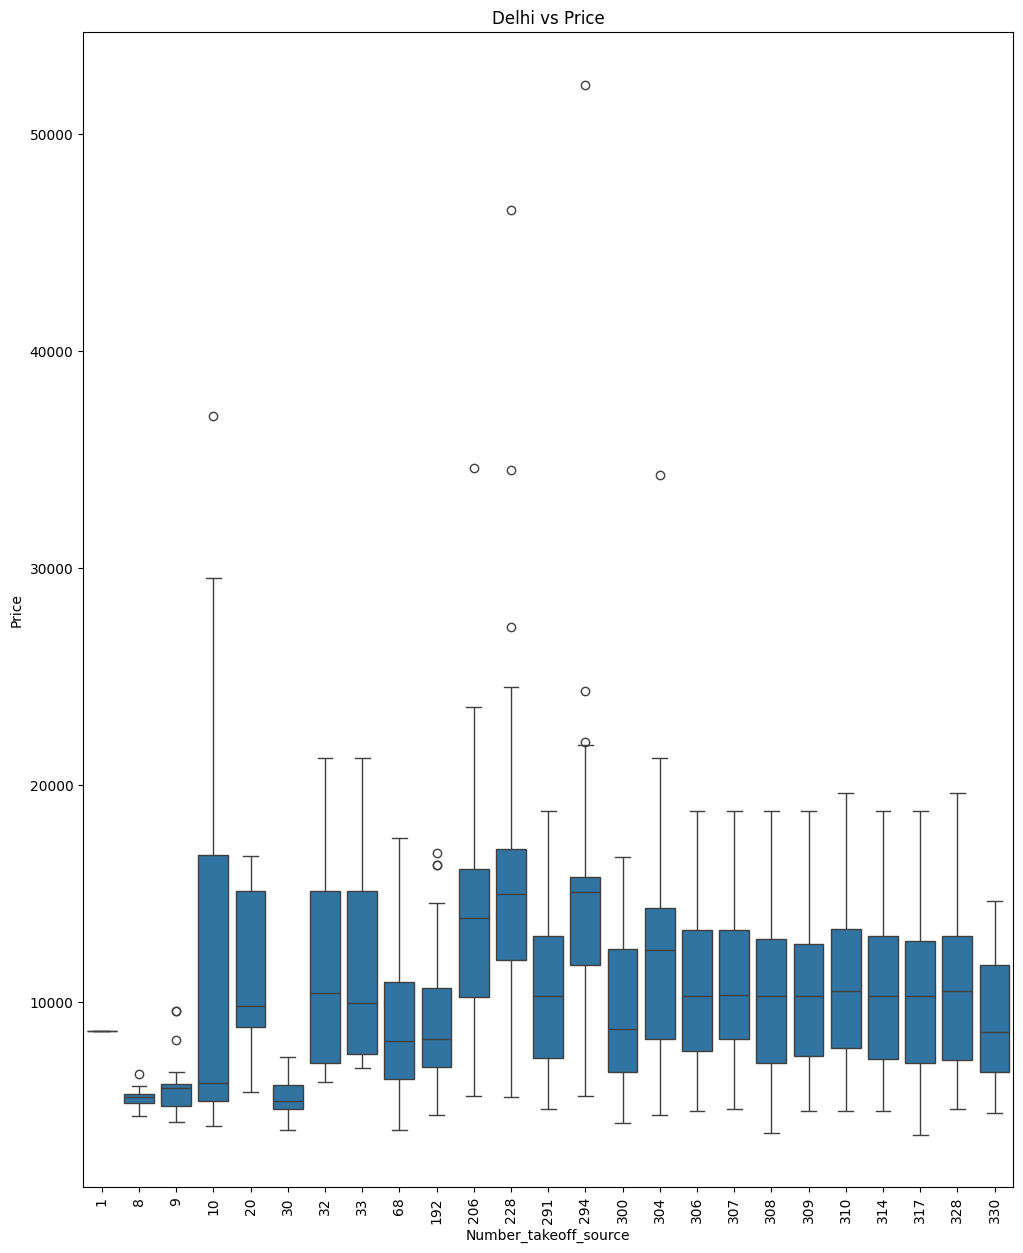

In [ ]:
plt.subplots(figsize=(12, 15))

# Explicitly define x and y arguments for sns.boxplot
sns.boxplot(
    x=train[train.Source == 'Delhi']
      .sort_values(['Date_of_Journey'])['Number_takeoff_source'],
    y=train[train.Source == 'Delhi']['Price']
)

plt.xticks(rotation=90)
plt.title('Delhi vs Price')
plt.show()


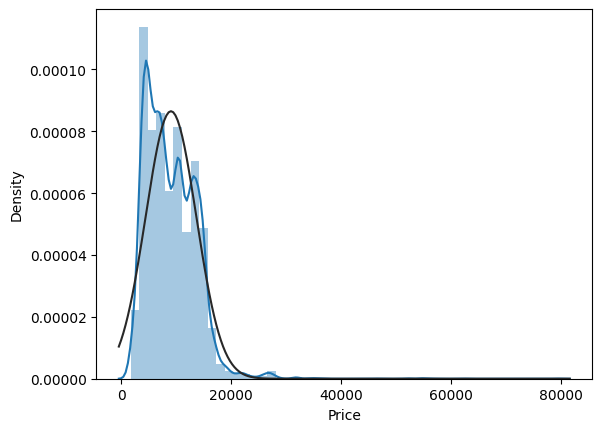

((array([-3.82690953, -3.60266143, -3.4795895 , ...,  3.4795895 ,
          3.60266143,  3.82690953]),
  array([ 1759.,  1759.,  1759., ..., 57209., 62427., 79512.])),
 (4364.062692425855, 9087.064120565383, 0.9460976378917301))

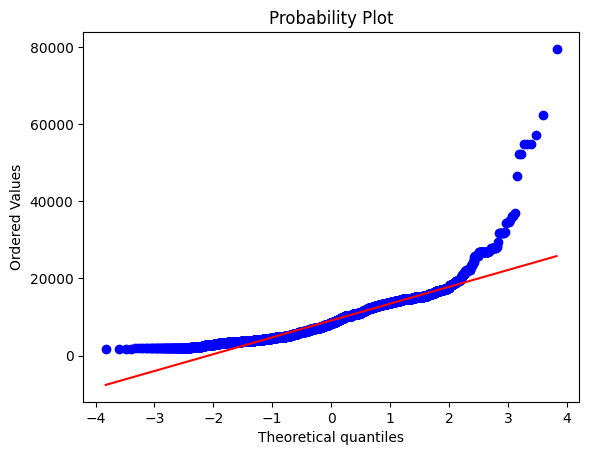

In [ ]:
sns.distplot(train[:len_train].Price,fit=stats.norm)
l=plt.show()
stats.probplot(train[:len_train].Price,plot=plt)


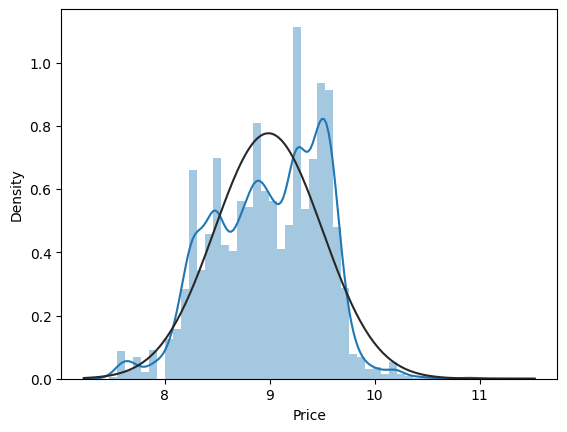

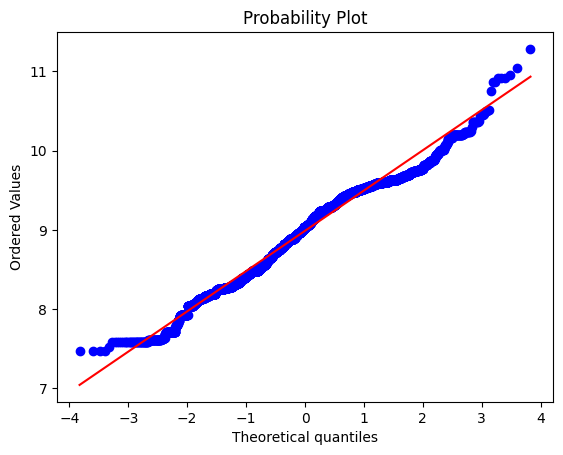

In [ ]:
xt=np.log(train[:len_train].Price)
sns.distplot(xt,fit=stats.norm)
l=plt.show()
stats.probplot(xt,plot=plt)
train.Price=np.log(train.Price)

In [ ]:
train.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
train.loc[
    (train.Source == 'Delhi') &
    (train.Destination == 'Cochin') &
    (pd.to_datetime(train.Date_of_Journey).dt.month == 5) &
    (train.Duration == 1420) &
    (train.Airline == 'Air India')
].sort_values(['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month_Of_Journey,Day_Of_Journey,Month_Of_Arrival,Day_Of_Arrival,Booking_Class,Market_Share,Number_take-offs,Number_landings,Number_takeoff_source,Number_landings_Destination
9039,Air India,2019-05-06,Delhi,Cochin,NaN,09:45:00,09:25:00,1420,NaN,No info,...,5,6,5,7,Economy,13.5,355,161,32,19
10348,Air India,2019-05-09,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No info,...,5,9,5,10,Economy,13.5,628,289,304,148
12318,Air India,2019-05-09,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No info,...,5,9,5,10,Economy,13.5,628,289,304,148
2343,Air India,2019-05-15,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No info,...,5,15,5,16,Economy,13.5,511,206,192,71
2554,Air India,2019-05-15,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No info,...,5,15,5,16,Economy,13.5,511,206,192,71
3595,Air India,2019-05-18,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No info,...,5,18,5,19,Economy,13.5,633,292,310,155
9717,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No info,...,5,18,5,19,Economy,13.5,633,292,310,155
8135,Air India,2019-05-21,Delhi,Cochin,DEL → HYD → MAA → COK,09:45:00,09:25:00,1420,2.0,No info,...,5,21,5,22,Economy,13.5,615,294,300,156
1616,Air India,2019-05-24,Delhi,Cochin,DEL → MAA → COK,09:45:00,09:25:00,1420,1.0,No info,...,5,24,5,25,Economy,13.5,357,164,33,16


In [ ]:
train.Route=train.Route.fillna('DEL → MAA → COK')
train.loc[train.Total_Stops.isnull(),'Total_Stops']=1

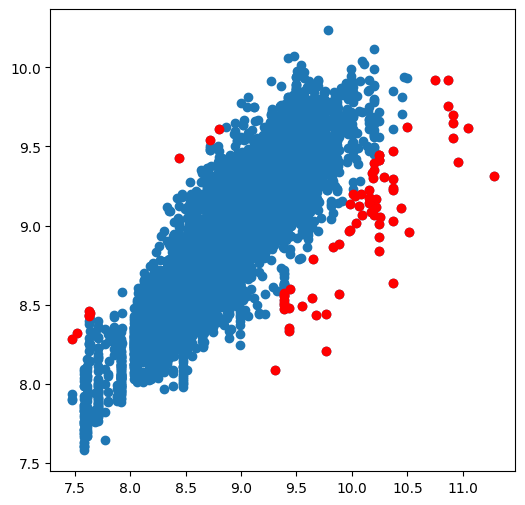

In [ ]:
# Outlier Treatment
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ElasticNet Model
ElasticNet = linear_model.ElasticNet

# Preparing data
x_out = pd.get_dummies(train[:len_train].drop('Price', axis=1))
y_out = train[:len_train]['Price']

# Initializing ElasticNet
enet = ElasticNet(max_iter=1000, alpha=0.001, l1_ratio=0)

# Fitting the model
enet.fit(x_out, y_out)

# Predictions
y_pred = enet.predict(x_out)

# Residuals and z-scores
resid = y_out - y_pred
z = (resid - resid.mean()) / resid.std()
z = np.array(z)

# Identifying outliers
outlier = np.where(abs(z) > abs(z).std() * 5)[0]

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(y_out, y_pred)
plt.scatter(y_out.iloc[outlier], y_pred[outlier], color='red')  # Highlighting outliers
plt.show()


In [ ]:
train['Date_of_Journey'] = train['Date_of_Journey'].astype('int64')

In [ ]:
print(train.dtypes)


Airline                              category
Date_of_Journey                         int64
Source                                 object
Destination                            object
Route                                  object
Dep_Time                               object
Arrival_Time                           object
Duration                                int64
Total_Stops                          category
Additional_Info                        object
Price                                 float64
Depart_Time_Hour                        int32
Depart_Time_Min                         int32
Arr_Time_Hour                           int32
Arr_Time_Min                            int32
Data_of_Arrival                datetime64[ns]
Class                                category
Same_day_travel                      category
weekday_journey                         int64
weekday_arrival                         int64
Year                                    int32
Month_Of_Journey                  

In [ ]:
# Convert 'object' and 'category' columns to numeric
from sklearn.preprocessing import LabelEncoder

for col in ['Source', 'Destination', 'Route', 'Additional_Info', 'Booking_Class']:
    train[col] = LabelEncoder().fit_transform(train[col])

# Extract features from 'datetime64' columns
train['Arrival_Year'] = train['Data_of_Arrival'].dt.year
train['Arrival_Month'] = train['Data_of_Arrival'].dt.month
train['Arrival_Day'] = train['Data_of_Arrival'].dt.day

# Drop original datetime column if features are sufficient
train.drop(columns=['Data_of_Arrival'], inplace=True)

# Convert 'category' type columns to integers
category_cols = train.select_dtypes(include=['category']).columns
for col in category_cols:
    train[col] = train[col].cat.codes


In [ ]:
x_out['Date_of_Journey'] = x_out['Date_of_Journey'].astype('int64')

In [ ]:
print(train.dtypes)  # Confirm all columns are numeric


Airline                           int8
Date_of_Journey                  int64
Source                           int64
Destination                      int64
Route                            int64
Dep_Time                        object
Arrival_Time                    object
Duration                         int64
Total_Stops                       int8
Additional_Info                  int64
Price                          float64
Depart_Time_Hour                 int32
Depart_Time_Min                  int32
Arr_Time_Hour                    int32
Arr_Time_Min                     int32
Class                             int8
Same_day_travel                   int8
weekday_journey                  int64
weekday_arrival                  int64
Year                             int32
Month_Of_Journey                 int32
Day_Of_Journey                   int32
Month_Of_Arrival                 int32
Day_Of_Arrival                   int32
Booking_Class                    int64
Market_Share             

In [ ]:
from scipy.stats import skew, boxcox, boxcox_normmax
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in train.columns:
    if i != 'Price':
        if train[i].dtype in numeric_dtypes:
            numerics2.append(i)

skew_features = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew': skew_features})
print(skews)

high_skew = skew_features[abs(skew_features) > 0.3]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    if i != 'Price':
        train[i] = boxcox(train[i] + 1, boxcox_normmax(train[i] + 1))
skew_features2 = train[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skew2 = pd.DataFrame({'skew': skew_features2})
print(skew2)


                                 skew
Booking_Class                9.563097
Destination                  1.247752
Duration                     0.867995
Market_Share                 0.763625
Depart_Time_Min              0.159379
Day_Of_Journey               0.135127
Arrival_Day                  0.132062
Day_Of_Arrival               0.132062
Arr_Time_Min                 0.111698
Depart_Time_Hour             0.109075
weekday_journey              0.040376
weekday_arrival              0.030020
Number_takeoff_source       -0.348689
Arr_Time_Hour               -0.384548
Number_landings_Destination -0.386354
Arrival_Month               -0.390640
Month_Of_Journey            -0.390640
Month_Of_Arrival            -0.390640
Date_of_Journey             -0.397941
Number_landings             -0.413211
Source                      -0.424103
Number_take-offs            -0.501536
Route                       -0.521331
Additional_Info             -1.784551
Year                              NaN
Arrival_Year

BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

In [ ]:
# Encoding categorical variables using one-hot encoding
df = pd.get_dummies(train)
# Splitting test and train data
train_df = df[:len_train]
test_df = df[len_train:]


In [ ]:
# Removing 'Price' from independent variable data and keeping only 'Price' in the dependent variable
x = train_df.drop('Price', axis=1)
y = train_df['Price']


In [ ]:
# Writing a function to evaluate model performance using K-Fold cross-validation
def rmsle_cv(model):
    kfold = KFold(n_splits=2, shuffle=True, random_state=10).get_n_splits(x)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse


In [ ]:
# Setting up the LightGBM model with specified parameters
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=80,
    learning_rate=0.1,
    n_estimators=1200,
    max_bin=30,
    bagging_fraction=0.8,
    bagging_freq=9,
    feature_fraction=0.129,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=3,
    min_sum_hessian_in_leaf=6,
    random_state=10
)


In [ ]:
!pip install lightgbm


In [ ]:
from lightgbm import LGBMRegressor


In [ ]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Writing a function to evaluate model performance using K-Fold cross-validation
def rmsle_cv(model):
    kfold = KFold(n_splits=2, shuffle=True, random_state=10)
    rmse = np.sqrt(-cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error'))
    return rmse

# Replace 'x' and 'y' with your feature matrix and target variable, respectively


In [ ]:
xgb=XGBRegressor(
    learning_rate=0.1,
    n_estimators=1500,
    max_depth=12,
    min_child_weight=1,
    gamma=0,
    reg_alpha=2e-5,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=4,  # 'nthread' is deprecated, use 'n_jobs' instead
    random_state=10,
    enable_categorical=True
)

rmsle_cv(xgb).mean(), rmsle_cv(xgb).std() # Commented for faster running of complete code

# Output:
# (0.12374148656110757, 0.0043551868776479236)
# Warnings: reg:linear is now deprecated in favor of reg:squarederr

grb=GradientBoostingRegressor(learning_rate=0.1,
                              n_estimators=400,
                              max_depth=12,
                              subsample=0.8,
                              verbose=False,
                              random_state=10)

rmsle_cv(grb).mean(), rmsle_cv(grb).std() # Commented for faster running of complete code


NameError: name 'X' is not defined

In [ ]:
pip install --upgrade scikit-learn xgboost


In [ ]:
pip install --upgrade xgboost


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

xgb_pipeline = make_pipeline(StandardScaler(), XGBRegressor())



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

xgb = XGBRegressor()



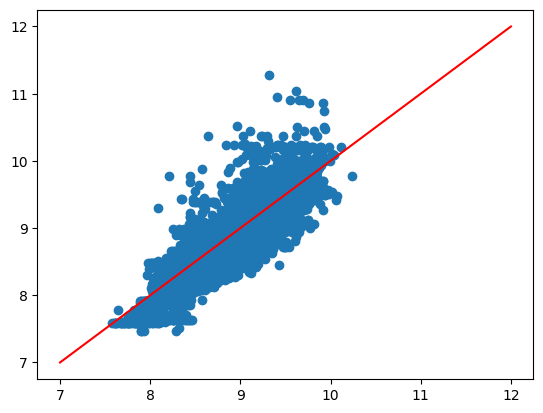

In [ ]:
plt.scatter(list(y_pred),y)
plt.plot(range(7,13),range(7,13),'r')
plt.show()